This is a recreation of the analysis done for the paper [**Class Advantage, Commitment Penalty: The Gendered Effect of Social Class Signals in an Elite Labor Market**](http://journals.sagepub.com/doi/pdf/10.1177/0003122416668154) by *Rivera et al.*  I generated the data set as binary vectors where 1 indicated every callback for an application.  Callbacks were modeled as Bernoulli random variables with a certain probability of a positive response; the probability is the value we want to estimate.

In [29]:
%matplotlib inline

import pymc3 as pm
import numpy as np
import scipy as sp

from IPython.core.pylabtools import figsize
import seaborn as sns
import matplotlib.pyplot as plt

figsize(12, 6)

## Utility Functions
def out_of(a, b):
    """This is used to generate the data.
    The first 'a' samples out of 'b' are set to 1, the rest are 0."""
    return [(1 if i < a else 0) for i in range(b)]


def find_theta(a):
    """This is the probabilistic function that estimates the value
    of 'theta', the activation probability parameter."""
    N_sample = 10000
    N_take = 5000

    with pm.Model():
        # Making no assumptions about theta
        theta = pm.Uniform('theta', lower=0, upper=1)
        
        data  = pm.Bernoulli('data', p=theta, observed=a)

        # Sample Time
        start = pm.find_MAP()
        # Slice runs a little more slowly but it gives better looking distributions
        step  = pm.Slice()
        trace = pm.sample(N_sample, step=step, start=start)

    return trace['theta'][N_take:]

The data simulated using the original callbacks and sample sizes.

In [30]:
male_high = out_of(13, 80)
male_low  = out_of(1, 78)
fem_high  = out_of(3, 79)
fem_low   = out_of(5, 79)

In [31]:
theta_mh = find_theta(male_high)
theta_ml = find_theta(male_low)
theta_fh = find_theta(fem_high)
theta_fl = find_theta(fem_low)

Optimization terminated successfully.
         Current function value: 37.477652
         Iterations: 6


100%|██████████| 10000/10000 [00:06<00:00, 1462.54it/s]


         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 9.352548
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10


100%|██████████| 10000/10000 [00:06<00:00, 1506.10it/s]


Optimization terminated successfully.
         Current function value: 15.932187
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


100%|██████████| 10000/10000 [00:06<00:00, 1510.37it/s]


Optimization terminated successfully.
         Current function value: 21.388216
         Iterations: 7
         Function evaluations: 8


100%|██████████| 10000/10000 [00:06<00:00, 1489.53it/s]

         Gradient evaluations: 8


This section analyzes the core result of the paper.  In fact, high status men are far more likely to get a callback than any other group.  There is a significant difference between low-class women and low-class men, but that doesn't mean anything if you consider the transitive closure formed by the comparisons.  That is, if it is unlikely that both groups of women are different, and it's unlikely that low-status men and high-status women are different, then it is unlikely that any of the three groups are different.  This also supports the results from the paper.  On a side not, I would like to see a larger study done to compare the differences between the groups less likely to get called back.

Probability of mh > ml is 0.9998%
Probability of mh > fh is 0.996%
Probability of mh > fl is 0.976%
Probability of fl > ml is 0.9436%
Probability of fh > ml is 0.8128%
Probability of fl > fh is 0.7466%

Mean of mh is 0.169727953917%
Mean of fl is 0.0740094297319%
Mean of fh is 0.0493091725674%
Mean of ml is 0.0247523222994%


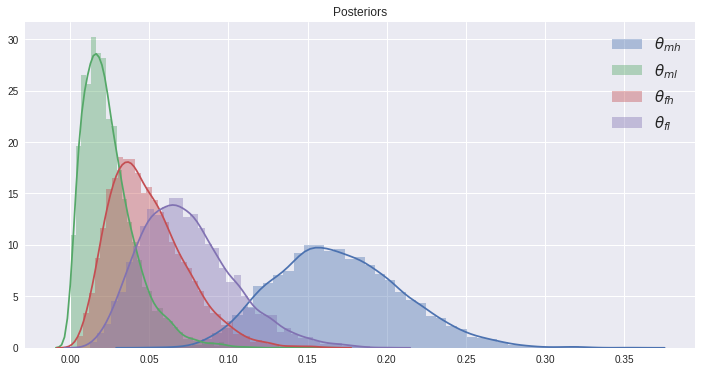

In [36]:
sns.distplot(theta_mh, label=r'$\theta_{mh}$')
sns.distplot(theta_ml, label=r'$\theta_{ml}$')
sns.distplot(theta_fh, label=r'$\theta_{fh}$')
sns.distplot(theta_fl, label=r'$\theta_{fl}$')
plt.legend(prop={'size': 15})
plt.title('Posteriors')

print('Probability of mh > ml is %s%%' % np.mean(theta_mh > theta_ml))
print('Probability of mh > fh is %s%%' % np.mean(theta_mh > theta_fh))
print('Probability of mh > fl is %s%%' % np.mean(theta_mh > theta_fl))
print('Probability of fl > ml is %s%%' % np.mean(theta_fl > theta_ml))
print('Probability of fh > ml is %s%%' % np.mean(theta_fh > theta_ml))
print('Probability of fl > fh is %s%%' % np.mean(theta_fl > theta_fh))
print("")

print("Mean of mh is %s%%" % np.mean(theta_mh))
print("Mean of fl is %s%%" % np.mean(theta_fl))
print("Mean of fh is %s%%" % np.mean(theta_fh))
print("Mean of ml is %s%%" % np.mean(theta_ml))

Now we combine the subgroups and analyze again.

In [33]:
theta_m = find_theta(male_high + male_low)
theta_f = find_theta(fem_high + fem_low)
theta_h = find_theta(male_high + fem_high)
theta_l = find_theta(male_low + fem_low)

Optimization terminated successfully.
         Current function value: 49.780665

100%|██████████| 10000/10000 [00:06<00:00, 1500.05it/s]



         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 34.643534
         Iterations: 8
         Function evaluations: 9

100%|██████████| 10000/10000 [00:06<00:00, 1471.11it/s]



         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 54.288361
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


100%|██████████| 10000/10000 [00:06<00:00, 1501.87it/s]


Optimization terminated successfully.
         Current function value: 28.704558
         Iterations: 8

100%|██████████| 10000/10000 [00:06<00:00, 1473.96it/s]


         Function evaluations: 9
         Gradient evaluations: 9


The next section compares men and women.  There is a less significant difference shown here, but that is most likely due to the men being comprised of both the highest and lowest scoring subgroups.  Unfortunately, this is probably the most meaningful result from this data; more on that later.

Probability of m > f is 0.9038%

Mean of m is 0.093326803142%
Mean of f is 0.055968118348%


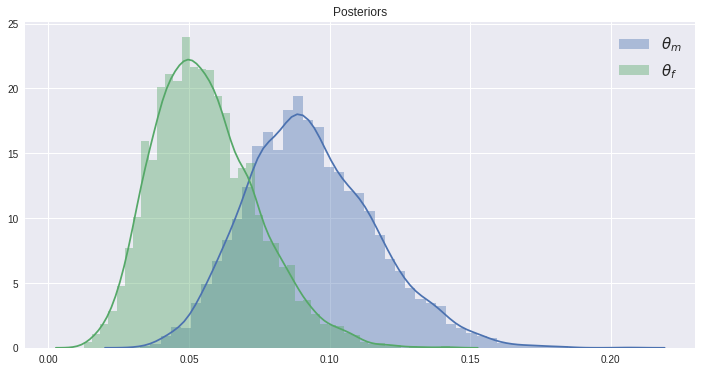

In [37]:
sns.distplot(theta_m, label=r'$\theta_{m}$')
sns.distplot(theta_f, label=r'$\theta_{f}$')
plt.legend(prop={'size': 15})
plt.title('Posteriors')

print('Probability of m > f is %s%%' % np.mean(theta_m > theta_f))
print("")

print("Mean of m is %s%%" % np.mean(theta_m))
print("Mean of f is %s%%" % np.mean(theta_f))

Rich is significantly different from poor; unfortunately, these results are very likely to be unreliable because
the way the authors encoded social class was odd.

For example, one of the activities used to designate high status was polo, and the low-status equivalent was pick-up-soccer.  If you don't have the qualifier they could be evenly compared and evaluated.  Listing a sport is ambiguous; you could play for fun on weekends, or you could play in a more serious league.  Adding the qualifier removes that possibility, therefore granting lower chances of success.

Another issue I found is when they compare sailing to track and field; both are undoubtedly taxing sports, but sailing seems like it would have a steeper learning curve and a much larger team element to it.

Finally, the athletic award was another unfortunate choice of encoding; the high-status applicant listed a "university award for athletic excellence" while the low status one listed the same but with the caveat that only students on financial aid were considered.  This is another limiting choice that probably biased the low status applications toward failure.

Probability of h > l is 0.9844%

Mean of m is 0.10580732278%
Mean of f is 0.0441936287703%


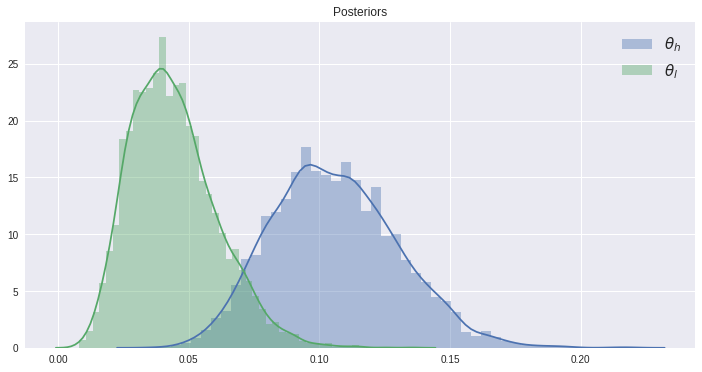

In [39]:
sns.distplot(theta_h, label=r'$\theta_{h}$')
sns.distplot(theta_l, label=r'$\theta_{l}$')
plt.legend(prop={'size': 15})
plt.title('Posteriors')

print('Probability of h > l is %s%%' % np.mean(theta_h > theta_l))
print("")

print("Mean of m is %s%%" % np.mean(theta_h))
print("Mean of f is %s%%" % np.mean(theta_l))